In [1]:
# let's look at the red stars and if they meet the SRD requirements

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline


In [3]:
baseline_file = get_baseline()
run_name = os.path.split(baseline_file)[-1].replace('.db', '')

print(run_name)

baseline_v3.0_10yrs


In [4]:
# Set up output
out_dir = 'temp'
resultsDb = maf.db.ResultsDb(out_dir=out_dir)


In [5]:
# I think the median u-band image has 5-sigma depth of 22, so to get snr=10
rmag = 22. - 2.5*np.log10(2)
print(rmag, maf.utils.m52snr(rmag, 22.))

21.247425010840047 10.000000000000002


In [6]:
bundle_list = []

sql = 'filter = "y"'

plot_dict = {"percentile_clip": 95}

summary_stats = [maf.MedianMetric()]

metric = maf.metrics.ParallaxMetric(
            metric_name="Parallax Uncert @ %.1f" % (rmag),
            rmag=rmag,
            normalize=False,
        )
slicer = maf.slicers.HealpixSlicer()

bundle_list.append(maf.MetricBundle(metric, slicer, sql,
                                    run_name=run_name,
                                    summary_metrics=summary_stats,
                                   plot_dict=plot_dict))


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [7]:
metric = maf.metrics.ProperMotionMetric(
            metric_name="Proper Motion Uncert @ %.1f" % (rmag),
            rmag=rmag,
            normalize=False,
        )

bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=run_name,
                                    summary_metrics=summary_stats,
                                   plot_dict=plot_dict))


In [8]:
bd = maf.make_bundles_dict_from_list(bundle_list)

In [9]:
g = maf.MetricBundleGroup(bd, baseline_file, out_dir)

In [10]:
g.run_all()

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 9780 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 523135149 bins, returning 200
  warnings.warn(


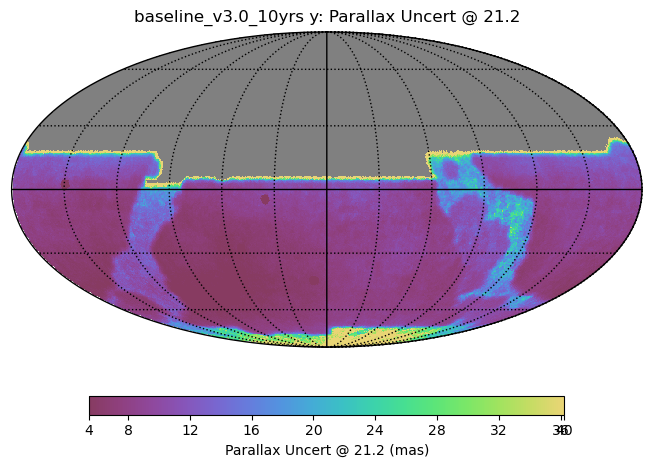

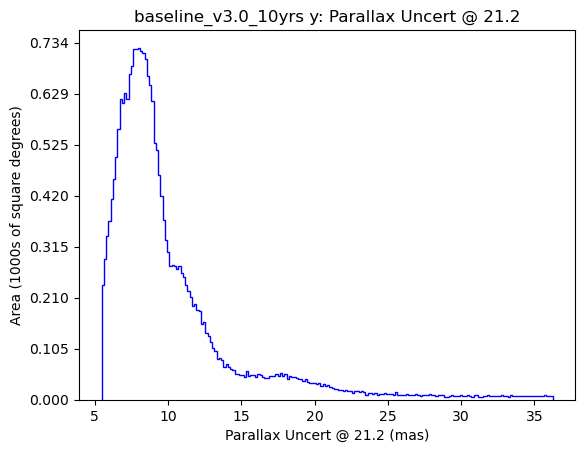

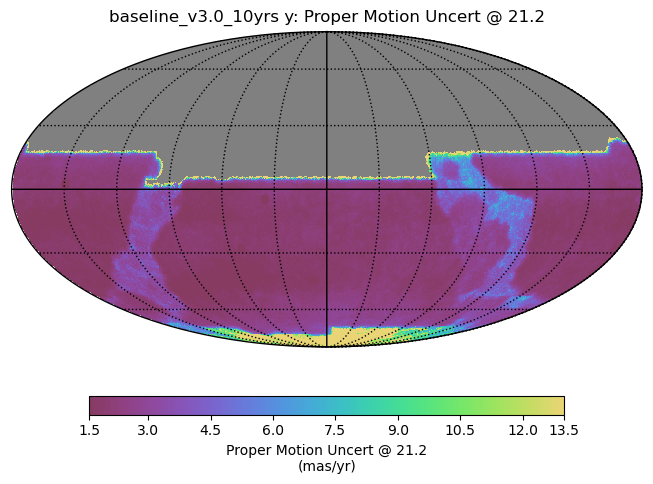

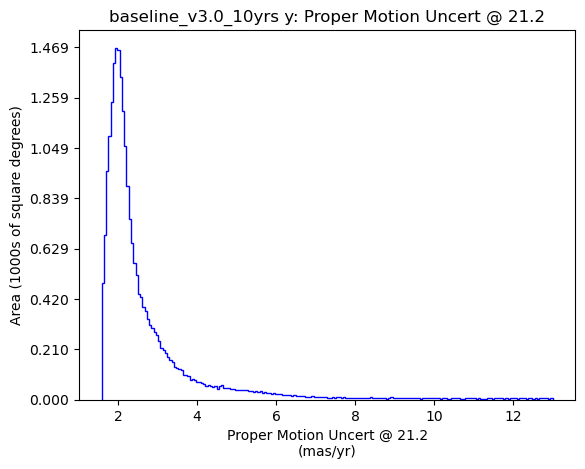

In [11]:
g.plot_all(closefigs=False)

In [12]:
# SRD says 6 mas for parallax, and maybe no proper motion requirement
bundle_list[0].summary_values

{'Median': 8.712814411711541}